## Loading the Dataset and Initial Review

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('merged_dataset.csv')

# Display the first few rows to understand its structure and what kind of data it contains
df.head()


,WorkOrder,Item No.,Item,Shipment,DateClosed,Order Qty_x,Completed Qty,FOH,VOH,ActualMaterialCost,...,Item Bill Number,Order Qty_y,Hours in date range,Up to date hours,Machines,Cycle Time,Predicted Hours,remainHours,Employee,WorkOrderID
0,15887.0,80-015-11582716,"ETWD BATTERY LINER, MACH",MS,2024-03-08,110.0,110.0,516.91,2072.72,312.00,...,80-015-11582716,110.00,55.07,55.07,"MORI LATHE I NZ2000, Mori 4000 C MILL",0.12,12.85,-42.22,"Young CHAE,Paul Hooker,Van Tai Dinh",15887.0
1,15854.0,80-585-7103926-9MW,ENCLOSURE+HDWT INSTALL ASSEM,WELD,2024-03-13,1.0,1.0,2037.73,7523.91,6585.83,...,80-585-7103926-9MW,1.00,39.33,39.33,HAAS VF11 L MILL,39.34,39.34,0.01,"Jason Le,Bryant Mai,Eric Chacon",15854.0
2,15808.0,80-535-7104257-2M,"COVER, BOTTOM, MACHINED",MS,2024-03-13,1.0,1.0,171.27,646.56,902.27,...,80-535-7104257-2M,1.00,12.62,12.62,MORI 8000 G MILL,8.31,8.31,-4.31,"Grant James,Peter Nguyen",15808.0
3,15807.0,80-535-7104257-2M,"COVER, BOTTOM, MACHINED",MS,2024-03-13,1.0,1.0,231.31,867.23,902.27,...,80-535-7104257-2M,1.00,16.69,16.69,MORI 8000 G MILL,8.31,8.31,-8.38,"Grant James,Peter Nguyen",15807.0
4,15806.0,80-535-7104257-2M,"COVER, BOTTOM, MACHINED",MS,2024-02-29,1.0,1.0,259.70,973.01,0.00,...,80-535-7104257-2M,1.00,16.91,16.91,MORI 8000 G MILL,8.31,8.31,-8.60,"Grant James,Peter Nguyen",15806.0


## Assessing Data Cleanliness and Preprocessing Needs

In [3]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Checking data types for potential inconsistencies
data_types = df.dtypes

missing_values, duplicate_rows, data_types


(WorkOrder                0
 Item No.                 0
 Item                     1
 Shipment               164
 DateClosed               0
 Order Qty_x              0
 Completed Qty            0
 FOH                      0
 VOH                      0
 ActualMaterialCost       0
 ActualLaborCost          0
 MaterialPerUnit          0
 LaborPerUnit             0
 OHPerUnit                0
 CostPerUnit              0
 Type                     0
 lot                      0
 Program                  3
 Work Order               0
 Routing Number           2
 Item Bill Number         0
 Order Qty_y              0
 Hours in date range      0
 Up to date hours         0
 Machines                 0
 Cycle Time              27
 Predicted Hours         27
 remainHours             27
 Employee                 0
 WorkOrderID              0
 dtype: int64,
 0,
 WorkOrder              float64
 Item No.                object
 Item                    object
 Shipment                object
 DateClosed  

## Data Cleaning Process

In [6]:
# Handling Missing Values and Correcting Data Types
df['Cycle Time'] = pd.to_numeric(df['Cycle Time'], errors='coerce').fillna(0)
df['Predicted Hours'] = pd.to_numeric(df['Predicted Hours'], errors='coerce').fillna(0)
df['remainHours'] = pd.to_numeric(df['remainHours'], errors='coerce').fillna(0)
df['Shipment'].fillna('Unknown', inplace=True)
df['Program'].fillna('Unknown', inplace=True)
df['DateClosed'] = pd.to_datetime(df['DateClosed'])

# Confirm the changes by re-checking data types and missing values.
df.dtypes, df.isnull().sum()


(WorkOrder                     float64
 Item No.                       object
 Item                           object
 Shipment                       object
 DateClosed             datetime64[ns]
 Order Qty_x                   float64
 Completed Qty                 float64
 FOH                           float64
 VOH                           float64
 ActualMaterialCost            float64
 ActualLaborCost               float64
 MaterialPerUnit                object
 LaborPerUnit                   object
 OHPerUnit                      object
 CostPerUnit                    object
 Type                           object
 lot                            object
 Program                        object
 Work Order                     object
 Routing Number                 object
 Item Bill Number               object
 Order Qty_y                    object
 Hours in date range            object
 Up to date hours               object
 Machines                       object
 Cycle Time              

## Exploratory Data Analysis (EDA)

,Cycle Time,Predicted Hours,remainHours,ActualLaborCost
count,434.000000,434.000000,434.000000,434.000000
mean,9.584032,16.494977,-9.546313,2159.752419
std,21.227471,24.857878,24.779028,10922.555809
min,-0.220000,-22.290000,-234.000000,0.000000
25%,0.112500,1.445000,-14.305000,556.227500
50%,0.950000,8.310000,-5.980000,943.590000
75%,8.310000,16.222500,0.000000,1779.657500
max,147.170000,147.170000,82.150000,203835.680000


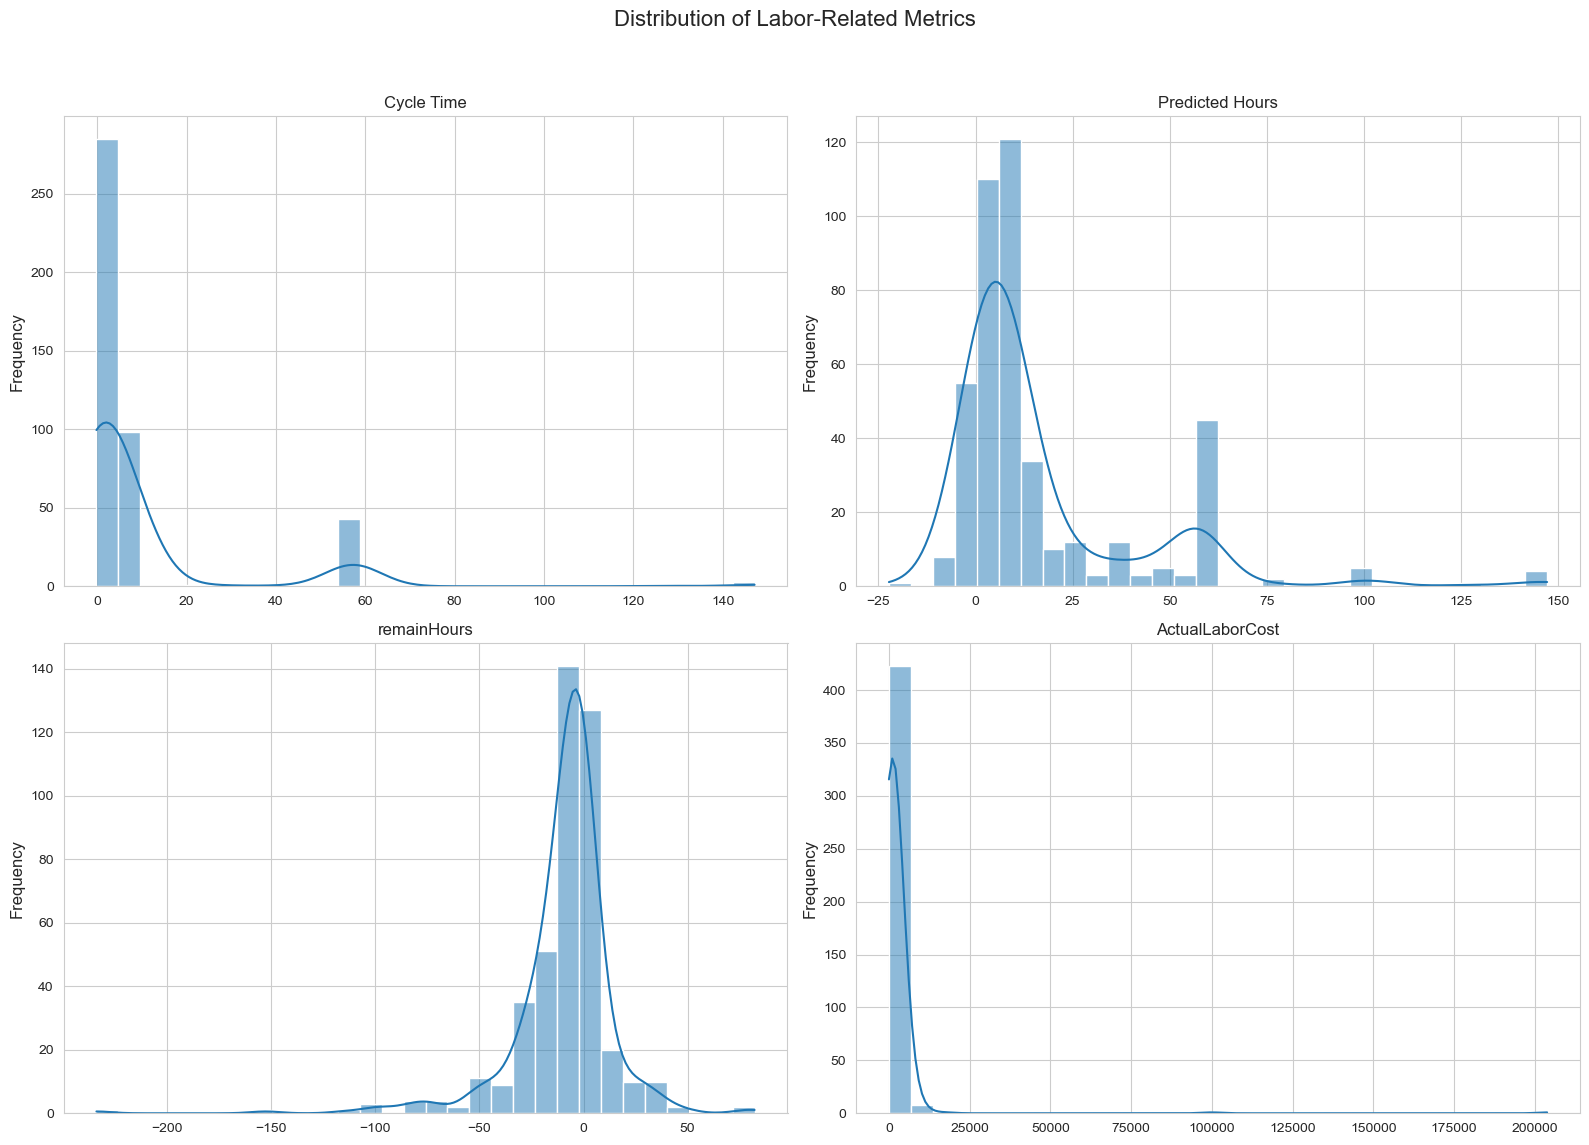

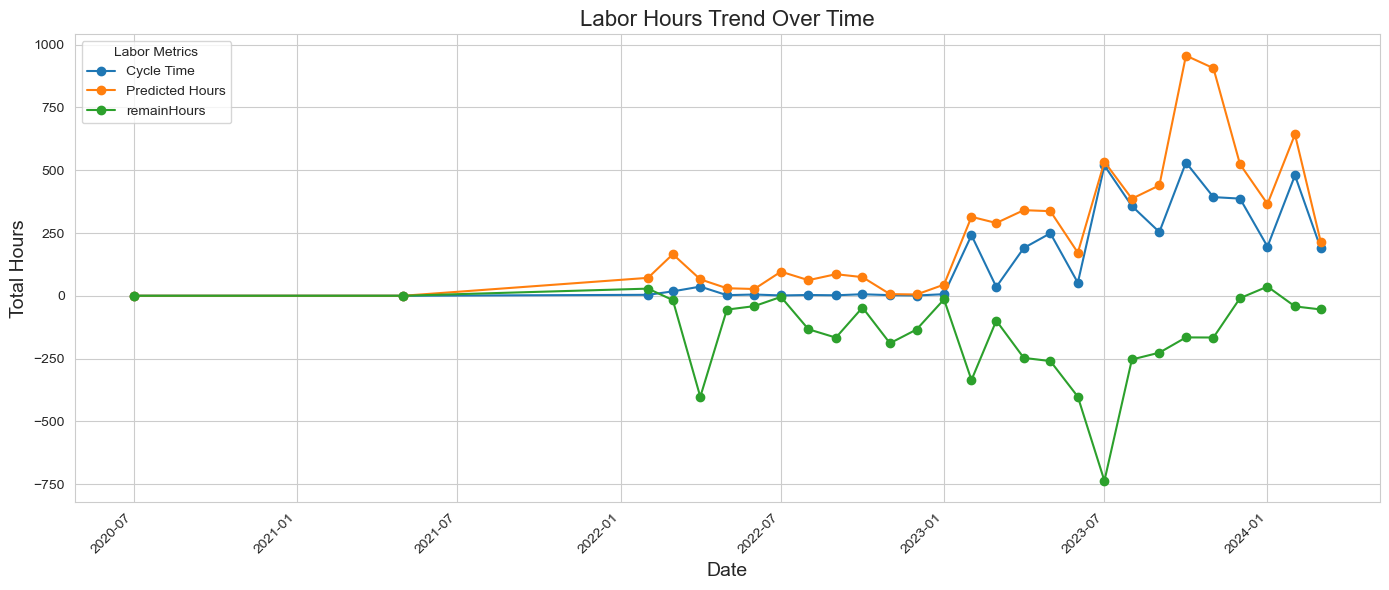

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Summary statistics for labor-related columns
labor_statistics = df[['Cycle Time', 'Predicted Hours', 'remainHours', 'ActualLaborCost']].describe()

# Distribution plots for labor-related columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.suptitle('Distribution of Labor-Related Metrics', fontsize=16)

for ax, column in zip(axes.flatten(), ['Cycle Time', 'Predicted Hours', 'remainHours', 'ActualLaborCost']):
    sns.histplot(df[column], kde=True, bins=30, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')
    ax.xaxis.get_label().set_fontsize(12)
    ax.yaxis.get_label().set_fontsize(12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Trends over time
labor_trend_data = df.groupby(df['DateClosed'].dt.to_period('M'))[['Cycle Time', 'Predicted Hours', 'remainHours']].sum().reset_index()
labor_trend_data['DateClosed'] = labor_trend_data['DateClosed'].dt.to_timestamp()

# Plotting labor hours trend over time
fig, ax = plt.subplots(figsize=(14, 6))
labor_trend_data.plot(x='DateClosed', y=['Cycle Time', 'Predicted Hours', 'remainHours'], ax=ax, marker='o')
ax.set_title('Labor Hours Trend Over Time', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Total Hours', fontsize=14)
ax.legend(title='Labor Metrics')

plt.xticks(rotation=45)
plt.tight_layout()

labor_statistics


## Deep Dive Analysis

### Relationship Between Predicted Hours and Actual Labor Cost

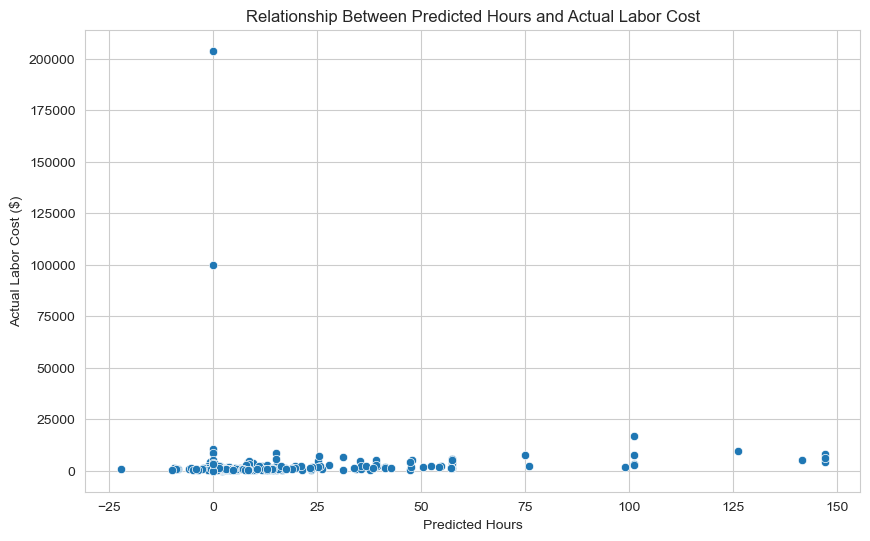

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Predicted Hours', y='ActualLaborCost', data=df)
plt.title('Relationship Between Predicted Hours and Actual Labor Cost')
plt.xlabel('Predicted Hours')
plt.ylabel('Actual Labor Cost ($)')
plt.grid(True)
plt.show()


### Identifying High Labor Cost Work Orders

In [9]:
top_labor_cost_wo = df.sort_values(by='ActualLaborCost', ascending=False)[['WorkOrder', 'ActualLaborCost', 'DateClosed']].head(5)
top_labor_cost_wo


,WorkOrder,ActualLaborCost,DateClosed
433,5966.0,203835.68,2022-06-23
283,12785.0,99903.04,2024-01-24
147,13976.0,17084.07,2023-09-05
180,13616.0,10385.50,2024-01-24
287,12726.0,9569.11,2023-07-25


### Correlation Analysis

In [10]:
labor_efficiency_correlation = df[['Cycle Time', 'Predicted Hours', 'remainHours', 'ActualLaborCost']].corr()
labor_efficiency_correlation

,Cycle Time,Predicted Hours,remainHours,ActualLaborCost
Cycle Time,1.000000,0.753286,-0.015541,0.031626
Predicted Hours,0.753286,1.000000,0.065792,0.045396
remainHours,-0.015541,0.065792,1.000000,-0.052120
ActualLaborCost,0.031626,0.045396,-0.052120,1.000000


## Labor Cost Trend Analysis

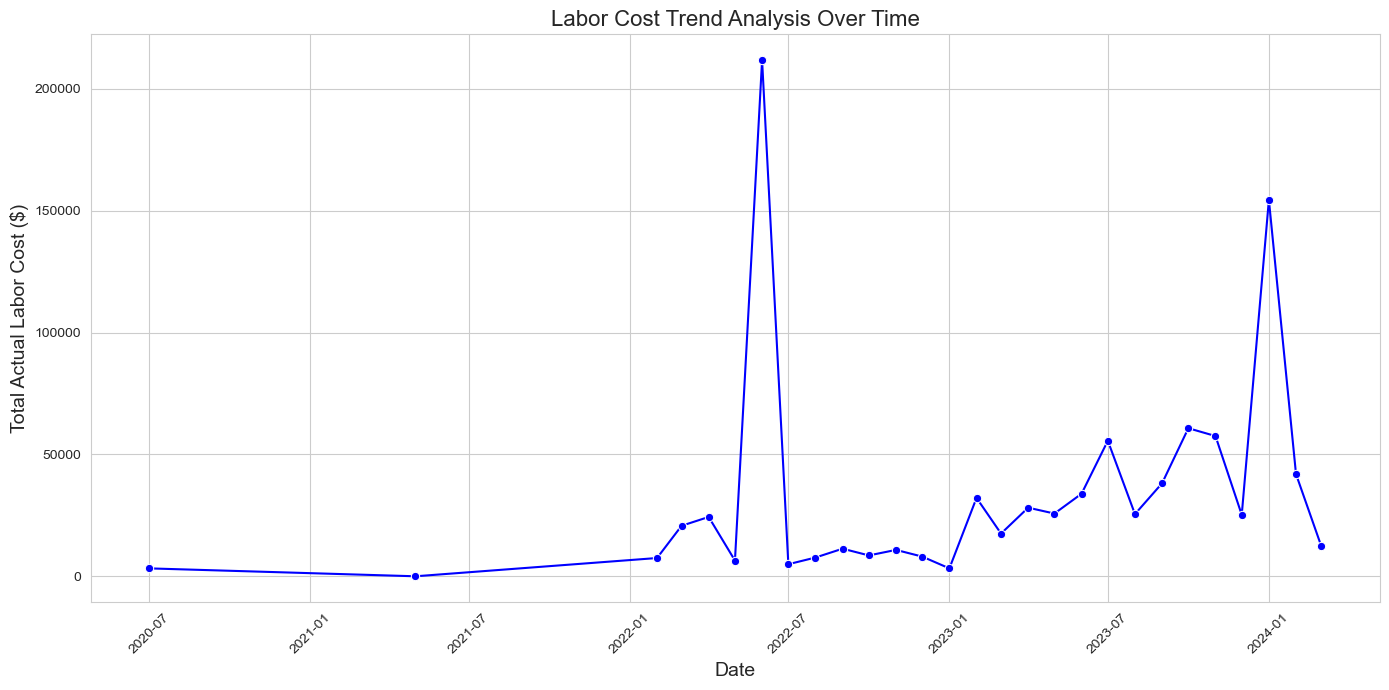

In [11]:
# Aggregating actual labor costs by month
labor_cost_trend = df.groupby(df['DateClosed'].dt.to_period('M'))['ActualLaborCost'].sum().reset_index()
labor_cost_trend['DateClosed'] = labor_cost_trend['DateClosed'].dt.to_timestamp()

# Plotting the labor cost trend over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='DateClosed', y='ActualLaborCost', data=labor_cost_trend, marker='o', color='blue')
plt.title('Labor Cost Trend Analysis Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Actual Labor Cost ($)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Cycle Time Trend Analysis

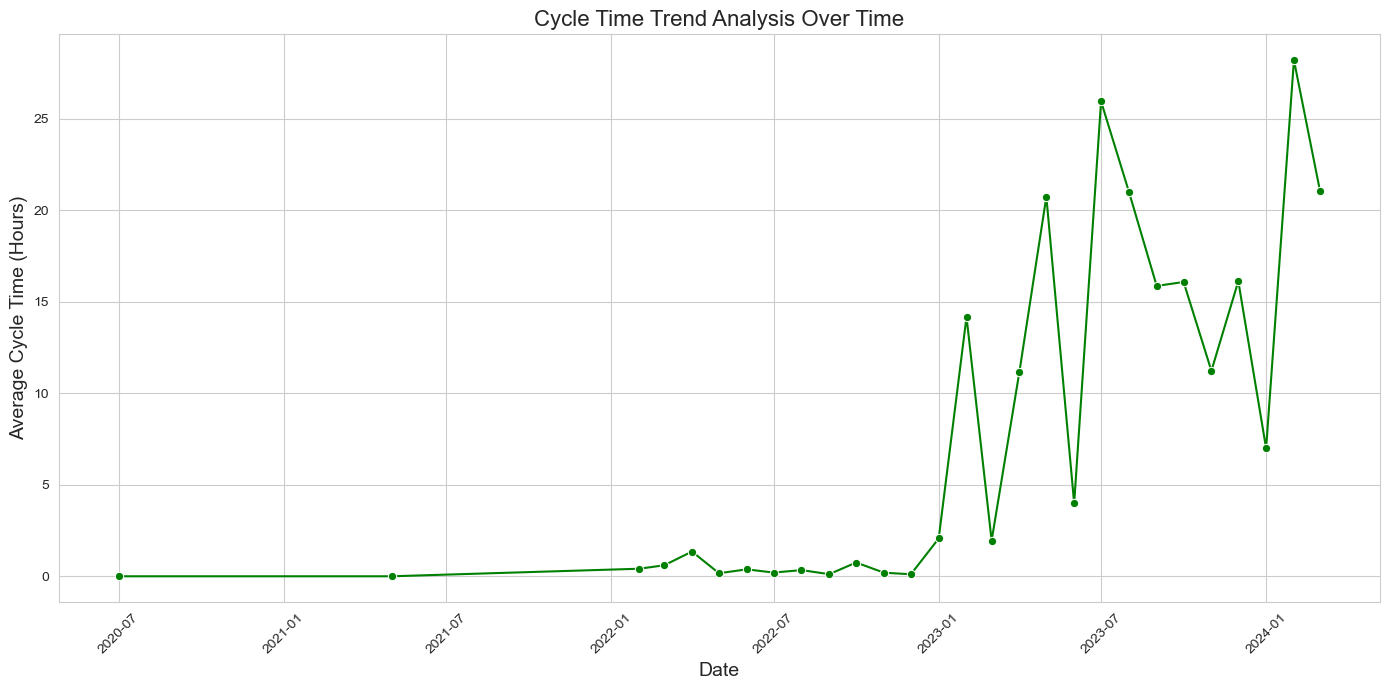

In [12]:
# Aggregating cycle times by month
cycle_time_trend = df.groupby(df['DateClosed'].dt.to_period('M'))['Cycle Time'].mean().reset_index()
cycle_time_trend['DateClosed'] = cycle_time_trend['DateClosed'].dt.to_timestamp()

# Plotting the cycle time trend over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='DateClosed', y='Cycle Time', data=cycle_time_trend, marker='o', color='green')
plt.title('Cycle Time Trend Analysis Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Cycle Time (Hours)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Throughput Analysis

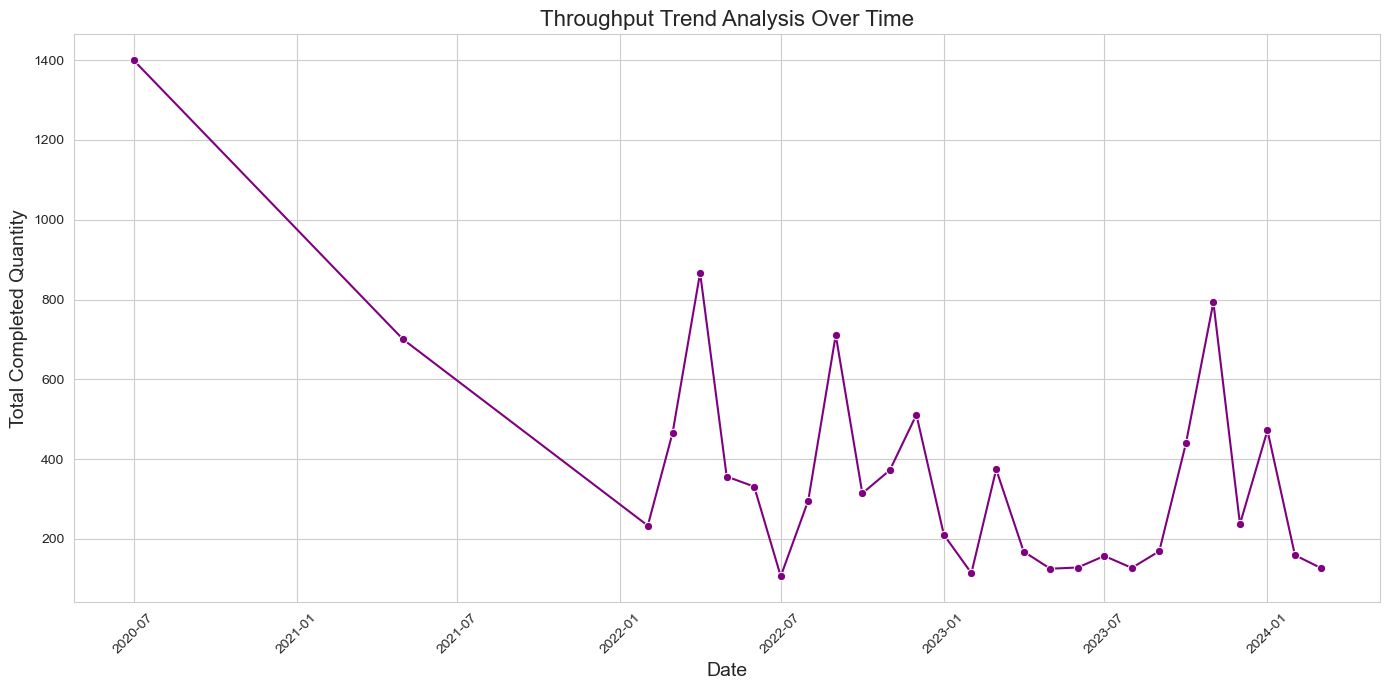

In [13]:
# Aggregating completed quantities by month to represent throughput
throughput_trend = df.groupby(df['DateClosed'].dt.to_period('M'))['Completed Qty'].sum().reset_index()
throughput_trend['DateClosed'] = throughput_trend['DateClosed'].dt.to_timestamp()

# Plotting the throughput trend over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='DateClosed', y='Completed Qty', data=throughput_trend, marker='o', color='purple')
plt.title('Throughput Trend Analysis Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Completed Quantity', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
